<a href="https://colab.research.google.com/github/iam-fern/Research/blob/main/sampling_generate_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from numpy.random import normal
import statistics

In [2]:
# numpy.random.normal(loc=0.0, scale=1.0, size=None)
# generate sample of 200 values that follow a normal distribution 
# data = normal(loc=0, scale=1, size=200)

data = pd.DataFrame({"zt1" : normal(0, 1, 50000),
                     "zt2" : normal(0, 1, 50000),
                     "zt3" : normal(0, 1, 50000)})
data

,zt1,zt2,zt3
0,-0.213344,0.621212,-1.004200
1,-0.127314,0.706326,0.081627
2,-0.452038,0.656611,-1.441214
3,0.871374,2.679392,0.530306
4,-0.339722,-0.651845,1.296675
...,...,...,...
49995,-2.219365,-0.549823,0.637236
49996,-0.597351,0.350863,1.055560
49997,0.576856,-0.149280,-1.147855
49998,-0.780357,-1.957611,-1.767201


In [3]:
n=50
rep=1
table_data_all=pd.DataFrame({"rep":[]})
data_copy=data.copy()
while not data_copy.empty:
    #=========================
    if data_copy.shape[0]>n:
        index=data_copy.sample(n).index
        data_new=data_copy.loc[index,:]
        data_copy=data_copy.drop(index)
    else:
        data_new=data_copy.copy()
        data_copy=pd.DataFrame({"":[]})
    #=========================
    p = 0

    Zt1 = data_new['zt1']
    Zt2 = data_new['zt2']
    Zt3 = data_new['zt3']

    xt1 = (1-(p**2))**(1/2)*Zt1
    xt2 = (1-(p**2))**(1/2)*Zt2
    xt3 = (1-(p**2))**(1/2)*Zt3

    new_data = pd.DataFrame({'Xt1' : data_new['zt1'],
                             'Xt2' : data_new['zt2'],
                             'Xt3' : data_new['zt3'],
                             'e'   : normal(0, xt2**4, n)})


    table_data = pd.DataFrame({'Xt1' : data_new['zt1'],
                               'Xt2' : data_new['zt2'],
                               'Xt3' : data_new['zt3'],
                               'e'   : new_data['e']})
    table_data['Y'] = 4+0.4*table_data['Xt1']+1.5*table_data['Xt2']+3.6*table_data['Xt3']+table_data['e']
    table_data['Y_hat'] = 4+0.4*table_data['Xt1']+1.5*table_data['Xt2']+3.6*table_data['Xt3']
    table_data['e_hat']=table_data['Y']-table_data['Y_hat']
    table_data=table_data.reset_index(drop=True).reset_index()
    table_data["rep"]=rep
    table_data_all=pd.concat([table_data_all,table_data],axis=0,ignore_index=True,sort=False)
    # display(table_data)
    rep+=1
    if rep==100:
      break
table_data_all=table_data_all.set_index(["rep","index"])
table_data_all

Xt1       Xt2       Xt3  ...          Y      Y_hat      e_hat
rep  index                                ...                                 
1.0  0.0   -1.720013  0.849249  0.934337  ...   8.258217   7.949483   0.308734
     1.0    0.890409  0.293905 -1.155870  ...   0.646518   0.635887   0.010630
     2.0    0.956706  0.036694 -0.687411  ...   1.963046   1.963045   0.000001
     3.0   -0.613823  0.188220  1.098127  ...   7.992139   7.990060   0.002078
     4.0    0.754545 -0.320974 -0.396001  ...   2.400964   2.394754   0.006210
...              ...       ...       ...  ...        ...        ...        ...
99.0 45.0   0.364434  1.740813  0.230261  ...  -5.067583   7.585934 -12.653517
     46.0   1.367506 -0.375272  3.082498  ...  15.064675  15.081089  -0.016413
     47.0  -0.024523  1.402693 -1.482187  ...   1.621683   0.758358   0.863325
     48.0   1.125073 -0.903064  1.006324  ...   6.823925   6.718199   0.105726
     49.0   0.627120 -0.234710  1.579314  ...   9.587921   9.584315   0.003607

[4950 rows x 7 columns]

In [4]:
table_data_all.mean()

Xt1      0.000532
Xt2      0.007631
Xt3     -0.003377
e       -0.027969
Y        3.971533
Y_hat    3.999502
e_hat   -0.027969
dtype: float64

In [5]:
table_data_all.var()

Xt1        0.991204
Xt2        1.010912
Xt3        0.973075
e        153.843044
Y        167.550271
Y_hat     15.081466
e_hat    153.843044
dtype: float64

In [6]:
# Compute pairwise correlation of columns, excluding NA/null values.
table_data_all.corr()

,Xt1,Xt2,Xt3,e,Y,Y_hat,e_hat
Xt1,1.000000,0.024385,-0.008177,0.006971,0.038044,0.104539,0.006971
Xt2,0.024385,1.000000,0.002904,-0.022326,0.096667,0.393508,-0.022326
Xt3,-0.008177,0.002904,1.000000,-0.006900,0.267824,0.914726,-0.006900
e,0.006971,-0.022326,-0.006900,1.000000,0.953943,-0.014265,1.000000
Y,0.038044,0.096667,0.267824,0.953943,1.000000,0.286350,0.953943
Y_hat,0.104539,0.393508,0.914726,-0.014265,0.286350,1.000000,-0.014265
e_hat,0.006971,-0.022326,-0.006900,1.000000,0.953943,-0.014265,1.000000


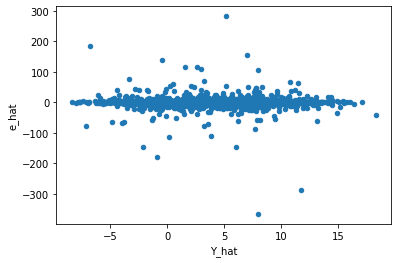

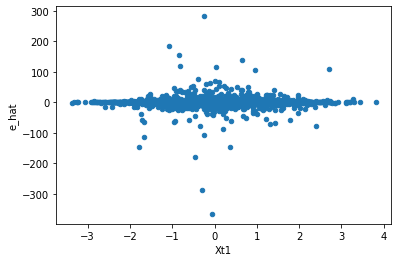

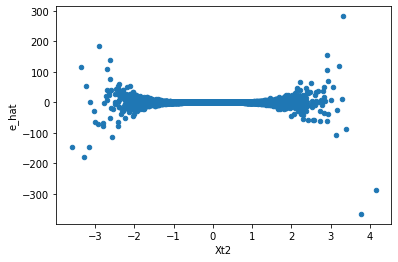

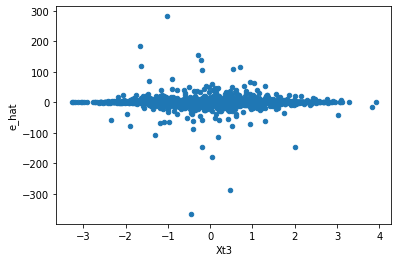

In [7]:
table_data_all.plot(x ='Y_hat', y='e_hat', kind = 'scatter')
table_data_all.plot(x ='Xt1', y='e_hat', kind = 'scatter')
table_data_all.plot(x ='Xt2', y='e_hat', kind = 'scatter')
table_data_all.plot(x ='Xt3', y='e_hat', kind = 'scatter')